In [1]:
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt
from vqvae import VQVAE

In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs = 100
batch_size = 256


model = VQVAE().to(device)
data = np.random.random((100000, 14))
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-3)
criterion = torch.nn.MSELoss()

In [23]:
losses = {"loss":[], "reconstruction_loss":[], "quant_loss":[], "perplexity":[]}
total_loss = 0
for epoch in range(epochs):
    for i in range(0, data.shape[0], batch_size):
        batch = torch.Tensor(data[i:i+batch_size,:]).to(model.device)
        optimizer.zero_grad()
        out, quant_loss, perplexity, _, _ = model(batch)
        reconstruction_loss = criterion(out, batch)
        loss = reconstruction_loss + quant_loss
        loss.backward()
        optimizer.step()
        scheduler.step()
        
        total_loss += loss.item()
        losses["loss"].append(loss.item())
        losses["reconstruction_loss"].append(reconstruction_loss.item())
        losses["quant_loss"].append(quant_loss.item())
        losses["perplexity"].append(perplexity.item())

        # print(f'{epoch=}, {loss.item()=}, {quant_loss.item()=}, {reconstruction_loss.item()=}')
    avg_loss = total_loss / 1000
    print(f'{epoch=} {avg_loss}')
    if (epoch + 1) % 5 == 0:
        model.print_codebook_utilization()
            # visualize_results(model, batch, out, epoch + 1)

epoch=0 0.29234388494491576
epoch=1 0.39736370103061197
epoch=2 0.4602780423611402
epoch=3 0.5078524606525898
epoch=4 0.5497215044423938
Codebook utilization: 100.00% (256/256 codes used)
epoch=5 0.589019314840436
epoch=6 0.6265725322663784
epoch=7 0.6631084330379963
epoch=8 0.6990175729319453
epoch=9 0.7344388490244746
Codebook utilization: 100.00% (256/256 codes used)
epoch=10 0.7695384028106927
epoch=11 0.8044023701325059
epoch=12 0.8390790169909597
epoch=13 0.873615078419447
epoch=14 0.9080808501765132
Codebook utilization: 100.00% (256/256 codes used)
epoch=15 0.9427095762863755
epoch=16 0.9775233545675873
epoch=17 1.0125307825878263
epoch=18 1.0478181481435895
epoch=19 1.0833425818756224
Codebook utilization: 100.00% (256/256 codes used)
epoch=20 1.1191037875637413
epoch=21 1.155153174623847
epoch=22 1.1914946713522077
epoch=23 1.2280411527752877
epoch=24 1.2648815504461526
Codebook utilization: 100.00% (256/256 codes used)
epoch=25 1.3019743853360415
epoch=26 1.3393447157740592


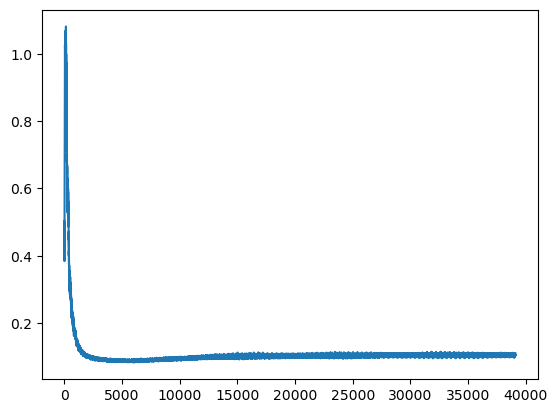

In [24]:
plt.plot(losses['loss'])


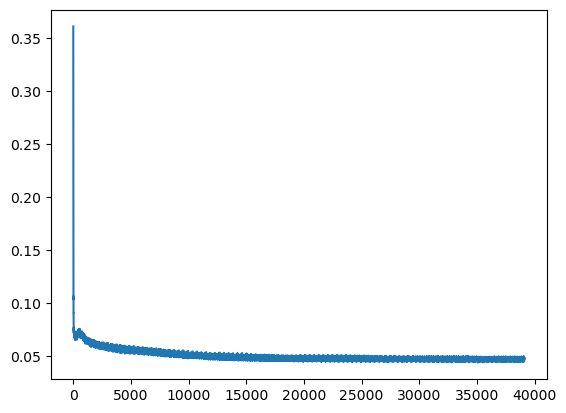

In [25]:
plt.plot(losses['reconstruction_loss'])


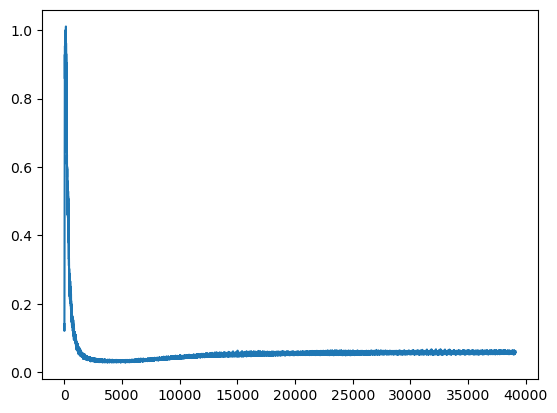

In [26]:
plt.plot(losses['quant_loss'])


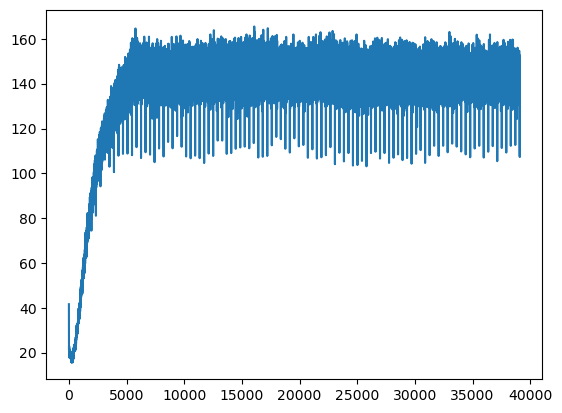

In [27]:
plt.plot(losses['perplexity'])

In [28]:
inp = torch.rand(2,14).to(model.device)
inp

tensor([[0.8515, 0.5345, 0.0034, 0.4892, 0.5009, 0.0608, 0.1909, 0.5732, 0.0859,
         0.6565, 0.4735, 0.5816, 0.3703, 0.7649],
        [0.9590, 0.4488, 0.1043, 0.6597, 0.6583, 0.1577, 0.0713, 0.2359, 0.8739,
         0.3447, 0.7852, 0.8337, 0.9698, 0.4516]], device='cuda:0')

In [29]:
model(inp)

(tensor([[0.5458, 0.7564, 0.5260, 0.5354, 0.2543, 0.5169, 0.5579, 0.7949, 0.2432,
          0.5759, 0.5103, 0.2508, 0.5506, 0.5030],
         [0.5503, 0.2673, 0.5710, 0.5188, 0.7829, 0.4930, 0.5365, 0.2157, 0.7706,
          0.4986, 0.5541, 0.7948, 0.5482, 0.5361]], device='cuda:0',
        grad_fn=<AddmmBackward0>),
 tensor(0.0566, device='cuda:0', grad_fn=<AddBackward0>),
 tensor(2., device='cuda:0'),
 tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0

In [15]:
torch.rand(1,14).shape

torch.Size([1, 14])

In [4]:
import json
import torch
from vector_quantize_pytorch import VectorQuantize

In [3]:
with open("../data_processing/pcqm_embedded.jsonl", "r") as file:
    data2 = json.load(file)

In [5]:
vq = VectorQuantize(
    dim = 256,
    codebook_size = 512,     # codebook size
    decay = 0.8,             # the exponential moving average decay, lower means the dictionary will change faster
    commitment_weight = 1.   # the weight on the commitment loss
)

x = torch.randn(1, 1024, 256)
quantized, indices, commit_loss = vq(x) # (1, 1024, 256), (1, 1024), (1)

In [28]:
commit_loss

tensor([0.5505], grad_fn=<AddBackward0>)

In [8]:
quantized.shape

torch.Size([1, 1024, 256])

In [27]:
quantized, indices, commit_loss = vq(x)

In [29]:
vq.codebook

tensor([[ 1.5866e-01,  2.0194e+00,  3.6269e-01,  ..., -1.3203e+00,
          3.1383e-01, -6.5922e-01],
        [-8.4068e-01, -4.4035e-01,  8.0086e-02,  ...,  3.1457e-01,
         -8.2180e-01,  2.0899e-01],
        [-8.3573e-01, -1.4355e-01,  1.5703e-02,  ...,  3.7219e-01,
          1.2503e+00, -6.5707e-01],
        ...,
        [ 7.5023e-02,  3.5866e-01,  8.3503e-01,  ..., -3.5261e-01,
          4.9256e-01, -2.0851e-01],
        [ 1.1047e+00, -4.5341e-02, -2.7145e-01,  ..., -1.1225e-01,
         -1.1163e+00, -6.0237e-01],
        [-4.8943e-03, -2.3459e-03, -3.9103e-03,  ...,  3.3503e-03,
         -9.4964e-04,  2.3408e-04]])